In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [25]:
df1 = pd.read_csv('/users/yuhaibo/downloads/UMD_2020_Fall/758W/FinalCleanExport.csv', sep=';', header=None)

In [26]:
df2 = pd.read_excel('../UMD_2020_Fall/758W/header.xlsx')
head = df2['Name']

In [27]:
df1.columns = head
pd.set_option('display.max_columns', None)
data = df1
data

Name,sl_userId,sl_hitOrder,sl_hitType,sl_timeStamp,userType,sessionCount,M_bounces,browser,browserVersion,operatingSystem,operatingSystemVersion,deviceCategory,browserSize,continent,subContinent,country,region,metro,city,cityId,continentId,countryIsoCode,metroId,regionId,regionIsoCode,ubContinentCode,language,screenResolution,hostname,pagePath,pageTitle,secondPagePath,M_timeOnPage,eventCategory,eventAction,eventLabel,M_eventValue,dimension1,dimension2,dimension3,dimension4
0,1.033490e+09,1,Pageview,2020-07-01 06:30:00,Returning Visitor,152,0,Chrome,83.0.4103.116,Windows,10,desktop,1670x750,Oceania,Australasia,New Zealand,Auckland,(not set),Auckland,1011036,009,NZ,0,20791,NZ-AUK,053,en-us,1366x768,admin.lifelenz.com,/https://admin.lifelenz.com/schedule/week/35ff...,Schedule | LifeLenz,/https://admin.lifelenz.com/timekeeping/week/3...,1.0,NaN,NaN,NaN,NaN,True,Role,Employee,Start time
1,1.033490e+09,2,Pageview,2020-07-01 06:30:01,Returning Visitor,152,0,Chrome,83.0.4103.116,Windows,10,desktop,1670x750,Oceania,Australasia,New Zealand,Auckland,(not set),Auckland,1011036,009,NZ,0,20791,NZ-AUK,053,en-us,1366x768,admin.lifelenz.com,/https://admin.lifelenz.com/timekeeping/week/3...,Timekeeping | LifeLenz,/https://admin.lifelenz.com/timekeeping/week/3...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.033490e+09,3,Event,2020-07-01 06:30:01,Returning Visitor,152,0,Chrome,83.0.4103.116,Windows,10,desktop,1670x750,Oceania,Australasia,New Zealand,Auckland,(not set),Auckland,1011036,009,NZ,0,20791,NZ-AUK,053,en-us,1366x768,admin.lifelenz.com,/https://admin.lifelenz.com/timekeeping/week/3...,Timekeeping | LifeLenz,/https://admin.lifelenz.com/timekeeping/week/3...,0.0,calendar-view-navigation,navigate,Day,0.0,NaN,NaN,NaN,NaN
3,1.033490e+09,4,Pageview,2020-07-01 06:30:05,Returning Visitor,152,0,Chrome,83.0.4103.116,Windows,10,desktop,1670x750,Oceania,Australasia,New Zealand,Auckland,(not set),Auckland,1011036,009,NZ,0,20791,NZ-AUK,053,en-us,1366x768,admin.lifelenz.com,/https://admin.lifelenz.com/timekeeping/day/35...,Timekeeping | LifeLenz,/https://admin.lifelenz.com/timekeeping/week/3...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.033490e+09,5,Pageview,2020-07-01 06:30:09,Returning Visitor,152,0,Chrome,83.0.4103.116,Windows,10,desktop,1670x750,Oceania,Australasia,New Zealand,Auckland,(not set),Auckland,1011036,009,NZ,0,20791,NZ-AUK,053,en-us,1366x768,admin.lifelenz.com,/https://admin.lifelenz.com/timekeeping/day/35...,Timekeeping | LifeLenz,/https://admin.lifelenz.com/timekeeping/week/3...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1273963,9.943893e+08,6,Pageview,2020-09-06 08:35:06,Returning Visitor,6,0,Chrome,70.0.3538.67,Windows,8,desktop,1020x660,Americas,Northern America,United States,Illinois,Chicago IL,Chicago,1016367,19,US,200602,21147,(not set),21,en-us,1024x768,admin.lifelenz.com,/https://admin.lifelenz.com/business-explorer,Business Explorer | LifeLenz,/https://admin.lifelenz.com/timekeeping/day/2f...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1273964,9.943893e+08,8,Pageview,2020-09-06 08:35:14,Returning Visitor,6,0,Chrome,70.0.3538.67,Windows,8,desktop,1020x660,Americas,Northern America,United States,Illinois,Chicago IL,Chicago,1016367,19,US,200602,21147,(not set),21,en-us,1024x768,admin.lifelenz.com,/https://admin.lifelenz.com/timekeeping/day/2f...,Timekeeping | LifeLenz,/https://admin.lifelenz.com/timekeeping/day/2f...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1273965,9.943893e+08,9,Event,2020-09-06 08:35:14,Returning Visitor,6,0,Chrome,70.0.3538.67,Windows,8,desktop,1020x660,Americas,Northern America,United States,Illinois,Chicago IL,Chicago,1016367,19,US,200602,21147,(not set),21,en-us,1024x768,admin.lifelenz.com,/https://admin.lifelenz.com/timekeeping/day/2f...,Timekeeping | LifeLenz,/https://admin.lifelenz.com/timekeeping/day/2f...,0.0,conversations,go-to-room,(not set),0.0,NaN,NaN,NaN,NaN
12

In [28]:
# time on page in each country
data.groupby('country').M_timeOnPage.mean().sort_values(ascending=True)

country
Austria            0.000000
Finland            0.000000
France             0.000000
India              0.000000
Netherlands        0.000000
Puerto Rico        0.000000
Brazil            16.500000
Mexico            17.251748
(not set)         18.000000
New Zealand       25.318364
United Kingdom    28.074890
Canada            28.529712
United States     30.541340
Australia         41.350755
Name: M_timeOnPage, dtype: float64

In [29]:
data["sl_timeStamp"] = data["sl_timeStamp"].astype("datetime64")

(array([737605., 737607., 737621., 737635., 737638., 737652., 737666.,
        737669.]), <a list of 8 Text xticklabel objects>)

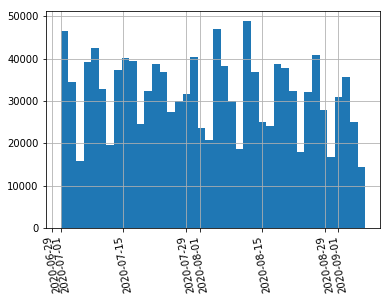

In [30]:
# when use app
data.sl_timeStamp.hist(bins=40)
plt.xticks(rotation=100)

In [55]:
# which platform use more
data.groupby("deviceCategory")["sl_userId"].nunique()/len(data["sl_userId"].unique())

deviceCategory
desktop    0.691680
mobile     0.284063
tablet     0.026071
Name: sl_userId, dtype: float64

In [32]:
len(data["sl_userId"].unique())

4411

In [33]:
pd.set_option('max_colwidth',150)
data['pagePath']

0             /https://admin.lifelenz.com/schedule/week/35ff745b-413a-4f67-8c4d-b86d267aa684/b1a9d404-8465-4545-a57a-3c06bd78a63b/2020-07-12
1          /https://admin.lifelenz.com/timekeeping/week/35ff745b-413a-4f67-8c4d-b86d267aa684/b1a9d404-8465-4545-a57a-3c06bd78a63b/2020-07-12
2          /https://admin.lifelenz.com/timekeeping/week/35ff745b-413a-4f67-8c4d-b86d267aa684/b1a9d404-8465-4545-a57a-3c06bd78a63b/2020-07-12
3           /https://admin.lifelenz.com/timekeeping/day/35ff745b-413a-4f67-8c4d-b86d267aa684/b1a9d404-8465-4545-a57a-3c06bd78a63b/2020-07-12
4           /https://admin.lifelenz.com/timekeeping/day/35ff745b-413a-4f67-8c4d-b86d267aa684/b1a9d404-8465-4545-a57a-3c06bd78a63b/2020-07-11
                                                                         ...                                                                
1273963                                                                                        /https://admin.lifelenz.com/business-explorer
1273964      

In [34]:
uuid = pd.read_excel('../UMD_2020_Fall/758W/UMD_UUID.xlsx')
uuid.head()

,Business UUID,Location UUID,Corporate Stores,AOS Stores
0,b1240d10-31c8-446c-b313-63e1260f3b99,c5076914-3a85-4e2c-b94d-aa749ce3c8ef,NaN,1.0
1,b1240d10-31c8-446c-b313-63e1260f3b99,d256ed70-b8fe-44fb-8978-964a4e512c4f,NaN,1.0
2,ac493e9a-0318-4094-adaa-00ddf1c951b1,d679fbec-d14e-477e-8e6b-3992f9dd53db,NaN,1.0
3,bc897331-2d62-4f2b-ab4a-bc14e2e4c088,caf3f475-e299-4137-99be-d5bcec699390,NaN,1.0
4,d7983aac-f81c-4295-86a8-a999fd1699a0,e62ea215-d221-4514-b272-b5ae7b48ea98,NaN,1.0


In [35]:
# AOS UUID list
aos_busid = list(uuid[uuid['AOS Stores'] == 1]['Business UUID'].unique())
aos_locid = list(uuid[uuid['AOS Stores'] == 1]['Location UUID'].unique())
aos_locid

['c5076914-3a85-4e2c-b94d-aa749ce3c8ef',
 'd256ed70-b8fe-44fb-8978-964a4e512c4f',
 'd679fbec-d14e-477e-8e6b-3992f9dd53db',
 'caf3f475-e299-4137-99be-d5bcec699390',
 'e62ea215-d221-4514-b272-b5ae7b48ea98',
 'c114b044-e446-45e6-8d1b-a478109f8133',
 'c3291ee2-7011-4f0d-a37e-3ba776d52a31',
 '8a625cb0-298d-4919-b366-5ed5e724e29b',
 '3d16b3c8-59b1-414e-a002-cd824c3454e0',
 'a19f5efe-6ae9-4c00-9bd1-dc72ca5a9435',
 'c34b0881-4ce3-496d-b1a9-3ac23efcdc4a',
 '2a5e073f-a575-49e2-bf40-24bb554d4258',
 'e41ae093-8bc0-4719-9154-faac161e4b53',
 '9e318665-9063-4d6a-904a-614678a28dd8',
 '668e5e5f-4713-4ab6-b27b-27a7b59ea2a3',
 '64e9e054-2880-4780-a20d-608e1e1f57dc']

In [36]:
# corporate UUID
cor_busid = uuid.iloc[-1, 0]
cor_locid = list(uuid[uuid['Business UUID'] == '0822be31-0815-47ee-aee5-25f41ac1730a']['Location UUID'])
cor_locid

['23cc778b-faac-4a82-8a32-dc6e26927b65',
 'b29574ae-25c1-422a-b6c1-3d5cc762b3ca',
 '0bc51dd8-69e4-4601-b9f4-742d80767a50',
 'dd7e3a3b-c68b-4a67-aabc-c782b5ac4fe1',
 'b914f8f4-04f2-4da9-8675-d90a598d227a',
 '32ee7086-697f-4098-8c66-b53bc399502e',
 '19fb2962-be89-4f6d-8051-1b73e45386df',
 '09cdf26e-403f-44ab-9573-62dfbb3cc147',
 'c674d090-fd82-4495-944d-63c1cbeaf3e2',
 '1940adbc-6aa0-4f3d-9347-561a513d7059',
 '7e3cba2c-e184-4a68-8144-1459126fc863',
 'abbc16bf-4d73-49ef-812b-ade297005be3',
 '23cfd247-01b7-4622-bd53-e73c3a28936a',
 '6521fb31-9d5a-477e-9438-6507024a7da6',
 '4fb65086-610b-4619-89ee-731fb36d88c2',
 '600fca12-ff77-4701-9dce-6a8f4656384b',
 '5f30355c-ef6f-42dd-8e41-040ca9cde9d3',
 '1a444f17-3d99-4f21-a0f5-35e06d96d44e',
 'c72ce677-44f9-4669-8cc2-941d9f2ca604',
 '52ddf358-a8d7-46ec-81c2-ef9de4ea4b37',
 'feb7f55c-0a16-48e2-88e3-658944b1ba9b',
 'f4268019-bb8b-4333-b49c-2bcfae72f95f',
 '61d1e52b-5131-4bb6-af96-3c1f208257ac']

In [37]:
# business id in data
bid = data.pagePath.str.split('/', expand=True).loc[:,6]
lid = data.pagePath.str.split('/', expand=True).loc[:,7]
bid

0          35ff745b-413a-4f67-8c4d-b86d267aa684
1          35ff745b-413a-4f67-8c4d-b86d267aa684
2          35ff745b-413a-4f67-8c4d-b86d267aa684
3          35ff745b-413a-4f67-8c4d-b86d267aa684
4          35ff745b-413a-4f67-8c4d-b86d267aa684
                           ...                 
1273963                                    None
1273964    2ffde98c-9248-4e87-a68d-0798a9917efe
1273965    2ffde98c-9248-4e87-a68d-0798a9917efe
1273966    35ff745b-413a-4f67-8c4d-b86d267aa684
1273967    35ff745b-413a-4f67-8c4d-b86d267aa684
Name: 6, Length: 1273968, dtype: object

In [38]:
# create list which is AOS stores and corporate stores
AOS = []
corporate = []
for i in lid:
    if i in aos_locid:
        AOS.append(1)
    else:
        AOS.append(0)

for i in lid:
    if i in cor_locid:
        corporate.append(1)
    else:
        corporate.append(0)

In [39]:
# merge columns to data
data['AOS'] = AOS
data['corporate'] = corporate

data_aos = data[(data.AOS == 1) | (data.corporate == 1)]
data_aos

Name,sl_userId,sl_hitOrder,sl_hitType,sl_timeStamp,userType,sessionCount,M_bounces,browser,browserVersion,operatingSystem,operatingSystemVersion,deviceCategory,browserSize,continent,subContinent,country,region,metro,city,cityId,continentId,countryIsoCode,metroId,regionId,regionIsoCode,ubContinentCode,language,screenResolution,hostname,pagePath,pageTitle,secondPagePath,M_timeOnPage,eventCategory,eventAction,eventLabel,M_eventValue,dimension1,dimension2,dimension3,dimension4,AOS,corporate
2912,1.546275e+09,2,Pageview,2020-07-01 02:08:01,Returning Visitor,62,0,Chrome,70.0.3538.67,Windows,8,desktop,1920x970,Americas,Northern America,United States,Illinois,Chicago IL,Evanston,1016453,019,US,200602,21147,US-IL,021,en-us,1920x1080,admin.lifelenz.com,/https://admin.lifelenz.com/timekeeping/day/60a19d58-6205-4b45-b23d-e041d0cc4db6/64e9e054-2880-4780-a20d-608e1e1f57dc/2020-06-30,Timekeeping | LifeLenz,/https://admin.lifelenz.com/timekeeping/day/60a19d58-6205-4b45-b23d-e041d0cc4db6/64e9e054-2880-4780-a20d-608e1e1f57dc/2020-06-30,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
2914,1.546275e+09,2,Pageview,2020-07-01 06:58:54,Returning Visitor,63,0,Chrome,70.0.3538.67,Windows,8,desktop,1920x970,Americas,Northern America,United States,Illinois,Chicago IL,Evanston,1016453,019,US,200602,21147,US-IL,021,en-us,1920x1080,admin.lifelenz.com,/https://admin.lifelenz.com/settings/schedule/60a19d58-6205-4b45-b23d-e041d0cc4db6/64e9e054-2880-4780-a20d-608e1e1f57dc/people-list,People List | Settings | LifeLenz,/https://admin.lifelenz.com/settings/schedule/60a19d58-6205-4b45-b23d-e041d0cc4db6/64e9e054-2880-4780-a20d-608e1e1f57dc/people-list,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
2915,1.546275e+09,3,Pageview,2020-07-01 06:59:00,Returning Visitor,63,0,Chrome,70.0.3538.67,Windows,8,desktop,1920x970,Americas,Northern America,United States,Illinois,Chicago IL,Evanston,1016453,019,US,200602,21147,US-IL,021,en-us,1920x1080,admin.lifelenz.com,/https://admin.lifelenz.com/schedule/day/60a19d58-6205-4b45-b23d-e041d0cc4db6/64e9e054-2880-4780-a20d-608e1e1f57dc/2020-06-30,Schedule | LifeLenz,/https://admin.lifelenz.com/settings/schedule/60a19d58-6205-4b45-b23d-e041d0cc4db6/64e9e054-2880-4780-a20d-608e1e1f57dc/people-list,56.0,NaN,NaN,NaN,NaN,False,Role,Employee,Start time,1,0
2916,1.546275e+09,4,Pageview,2020-07-01 06:59:56,Returning Visitor,63,0,Chrome,70.0.3538.67,Windows,8,desktop,1920x970,Americas,Northern America,United States,Illinois,Chicago IL,Evanston,1016453,019,US,200602,21147,US-IL,021,en-us,1920x1080,admin.lifelenz.com,/https://admin.lifelenz.com/schedule/day/60a19d58-6205-4b45-b23d-e041d0cc4db6/64e9e054-2880-4780-a20d-608e1e1f57dc/2020-07-14,Schedule | LifeLenz,/https://admin.lifelenz.com/settings/schedule/60a19d58-6205-4b45-b23d-e041d0cc4db6/64e9e054-2880-4780-a20d-608e1e1f57dc/people-list,9.0,NaN,NaN,NaN,NaN,False,Role,Employee,Start time,1,0
2917,1.546275e+09,5,Pageview,2020-07-01 07:00:05,Returning Visitor,63,0,Chrome,70.0.3538.67,Windows,8,desktop,1920x970,Americas,Northern America,United States,Illinois,Chicago IL,Evanston,1016453,019,US,200602,21147,US-IL,021,en-us,1920x1080,admin.lifelenz.com,/https://admin.lifelenz.com/schedule/week/60a19d58-6205-4b45-b23d-e041d0cc4db6/64e9e054-2880-4780-a20d-608e1e1f57dc/2020-07-14,Schedule | LifeLenz,/https://admin.lifelenz.com/settings/schedule/60a19d58-6205-4b45-b23d-e041d0cc4db6/64e9e054-2880-4780-a20d-608e1e1f57dc/people-list,7.0,NaN,NaN,NaN,NaN,False,Role,Employee,Start time,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1273710,9.253984e+08,1,Pageview,2020-09-06 14:34:00,Returning Visitor,872,1,Safari,13.1.2,iOS,13.6.1,mobile,380x640,Americas,Northern America,United States,New York,"New York, NY",New York,1023191,19,US,200501,21167,(not set),21,en,375x812,admin.lifelenz.com,/https://admin.lifelenz.com/timekeeping/week/0822be31-0815-47ee-aee5-25f41ac1730a/600fca12-ff77-4701-9dce-6a

In [56]:
data_aos[data_aos.AOS == 1].groupby("deviceCategory")["sl_userId"].nunique()/len(data_aos[data_aos.AOS == 1]["sl_userId"].unique())

deviceCategory
desktop    0.912844
mobile     0.064220
tablet     0.027523
Name: sl_userId, dtype: float64

In [57]:
data_aos[data_aos.AOS == 0].groupby("deviceCategory")["sl_userId"].nunique()/len(data_aos[data_aos.AOS == 0]["sl_userId"].unique())

deviceCategory
desktop    0.843836
mobile     0.098630
tablet     0.065753
Name: sl_userId, dtype: float64

In [53]:
data_aos.groupby(["country", "AOS"])["sl_userId"].nunique()

country        AOS
Australia      0       11
               1       15
Brazil         1        1
Canada         0        2
               1        2
United States  0      352
               1      201
Name: sl_userId, dtype: int64

In [17]:
# save dataset
data_aos.to_csv('../UMD_2020_Fall/758W/data_aos.csv')

In [18]:
data_aos.eventAction.unique()

array([nan, 'navigate', 'quick-publish', 'logout',
       'toggle-invite-details', 'rerun-compliance',
       'show-cancel-auto-scheduling-dialog', 'show-autoschedule-dialog',
       'click', 'expand', 'collapse', 'submit-snapshot',
       'compliance-toggle', 'tab-change', 'view-shift-list', 'Close',
       'settings-change', 'open-shift-drop-dialog', 'Confirm & Send',
       'Ok', 'cancel', 'open-unavailability-dialog', 'hide group', 'show',
       'clear-all-filters', 'view-tab', 'hide', 'mark-as-absent',
       'select-day', 'saved-successfully', 'delete', 'post',
       'show-publish-dialog', 'close', 'show-tips', 'next',
       'quick-create', 'apply', 'ok', 'batch-change-publish-status',
       'confirm-save', 'view-print-friendly', 'download-pdf',
       'change-forecast', 'generate-schedule', 'continue',
       'send-consent-request', 'quick-edit', 'drop-employee-to-create',
       'show-unpublish-dialog', 'approve-snapshot',
       'new-shift-button-click', 'invite-user', 'se

In [19]:
data_aos.eventCategory.unique()

array([nan, 'calendar-view-navigation', 'schedule-menu', 'top-nav',
       'employee-details', 'compliance-warning-dropdown',
       'auto-scheduling-menu', 'timepunch-details', 'flyout',
       'analytics-menu', 'employee-availability-summary',
       'manager-approval - shift-list', 'notification-panel',
       'manager-approval - shift-drop',
       'manager-approval - unavailability', 'compliance-warning-filter',
       'shift-details-panel', 'shift-filter', 'change-visibility',
       'shift-action', 'schedule', 'splash-screen', 'tips',
       'auto-create-breaks', 'compliance-actions', 'report',
       'analytics-action', 'manager-approval', 'schedule-action',
       'schedule-config', 'invite-user', 'conversations', 'payments',
       'timeclock', 'compliance-pay', 'compliance-table',
       'growl-notification', 'shift-summary',
       'manager-approval - shift-swap', 'availability-publishing',
       'role-filter', 'forecast-filter', 'analytics-summary',
       'schedule-view-

In [20]:
data_aos['swap'] = data_aos.eventCategory.apply(lambda x: 1 if x == 'manager-approval - shift-swap' else 0)
data_aos['drop'] = data_aos.eventCategory.apply(lambda x: 1 if x == 'manager-approval - shift-drop' else 0)
data_aos['absent'] = data_aos.eventAction.apply(lambda x: 1 if x == 'mark-as-absent' else 0)
data_aos

/Users/yuhaibo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/yuhaibo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/yuhaibo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Name,sl_userId,sl_hitOrder,sl_hitType,sl_timeStamp,userType,sessionCount,M_bounces,browser,browserVersion,operatingSystem,operatingSystemVersion,deviceCategory,browserSize,continent,subContinent,country,region,metro,city,cityId,continentId,countryIsoCode,metroId,regionId,regionIsoCode,ubContinentCode,language,screenResolution,hostname,pagePath,pageTitle,secondPagePath,M_timeOnPage,eventCategory,eventAction,eventLabel,M_eventValue,dimension1,dimension2,dimension3,dimension4,AOS,corporate,swap,drop,absent
2912,1.546275e+09,2,Pageview,2020-07-01 02:08:01,Returning Visitor,62,0,Chrome,70.0.3538.67,Windows,8,desktop,1920x970,Americas,Northern America,United States,Illinois,Chicago IL,Evanston,1016453,019,US,200602,21147,US-IL,021,en-us,1920x1080,admin.lifelenz.com,/https://admin.lifelenz.com/timekeeping/day/60a19d58-6205-4b45-b23d-e041d0cc4db6/64e9e054-2880-4780-a20d-608e1e1f57dc/2020-06-30,Timekeeping | LifeLenz,/https://admin.lifelenz.com/timekeeping/day/60a19d58-6205-4b45-b23d-e041d0cc4db6/64e9e054-2880-4780-a20d-608e1e1f57dc/2020-06-30,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0
2914,1.546275e+09,2,Pageview,2020-07-01 06:58:54,Returning Visitor,63,0,Chrome,70.0.3538.67,Windows,8,desktop,1920x970,Americas,Northern America,United States,Illinois,Chicago IL,Evanston,1016453,019,US,200602,21147,US-IL,021,en-us,1920x1080,admin.lifelenz.com,/https://admin.lifelenz.com/settings/schedule/60a19d58-6205-4b45-b23d-e041d0cc4db6/64e9e054-2880-4780-a20d-608e1e1f57dc/people-list,People List | Settings | LifeLenz,/https://admin.lifelenz.com/settings/schedule/60a19d58-6205-4b45-b23d-e041d0cc4db6/64e9e054-2880-4780-a20d-608e1e1f57dc/people-list,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0
2915,1.546275e+09,3,Pageview,2020-07-01 06:59:00,Returning Visitor,63,0,Chrome,70.0.3538.67,Windows,8,desktop,1920x970,Americas,Northern America,United States,Illinois,Chicago IL,Evanston,1016453,019,US,200602,21147,US-IL,021,en-us,1920x1080,admin.lifelenz.com,/https://admin.lifelenz.com/schedule/day/60a19d58-6205-4b45-b23d-e041d0cc4db6/64e9e054-2880-4780-a20d-608e1e1f57dc/2020-06-30,Schedule | LifeLenz,/https://admin.lifelenz.com/settings/schedule/60a19d58-6205-4b45-b23d-e041d0cc4db6/64e9e054-2880-4780-a20d-608e1e1f57dc/people-list,56.0,NaN,NaN,NaN,NaN,False,Role,Employee,Start time,1,0,0,0,0
2916,1.546275e+09,4,Pageview,2020-07-01 06:59:56,Returning Visitor,63,0,Chrome,70.0.3538.67,Windows,8,desktop,1920x970,Americas,Northern America,United States,Illinois,Chicago IL,Evanston,1016453,019,US,200602,21147,US-IL,021,en-us,1920x1080,admin.lifelenz.com,/https://admin.lifelenz.com/schedule/day/60a19d58-6205-4b45-b23d-e041d0cc4db6/64e9e054-2880-4780-a20d-608e1e1f57dc/2020-07-14,Schedule | LifeLenz,/https://admin.lifelenz.com/settings/schedule/60a19d58-6205-4b45-b23d-e041d0cc4db6/64e9e054-2880-4780-a20d-608e1e1f57dc/people-list,9.0,NaN,NaN,NaN,NaN,False,Role,Employee,Start time,1,0,0,0,0
2917,1.546275e+09,5,Pageview,2020-07-01 07:00:05,Returning Visitor,63,0,Chrome,70.0.3538.67,Windows,8,desktop,1920x970,Americas,Northern America,United States,Illinois,Chicago IL,Evanston,1016453,019,US,200602,21147,US-IL,021,en-us,1920x1080,admin.lifelenz.com,/https://admin.lifelenz.com/schedule/week/60a19d58-6205-4b45-b23d-e041d0cc4db6/64e9e054-2880-4780-a20d-608e1e1f57dc/2020-07-14,Schedule | LifeLenz,/https://admin.lifelenz.com/settings/schedule/60a19d58-6205-4b45-b23d-e041d0cc4db6/64e9e054-2880-4780-a20d-608e1e1f57dc/people-list,7.0,NaN,NaN,NaN,NaN,False,Role,Employee,Start time,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1273710,9.253984e+08,1,Pageview,2020-09-06 14:34:00,Returning Visitor,872,1,Safari,13.1.2,iOS,13.6.1,mobile,380x640,Americas,Northern America,United States,New York,"New York, NY",New York,1023191,19,US,200501,21167,(not set),21,en,375x812,admin.lifelenz.com,/https://admin.lifelenz.com/timekeeping/week/0822

In [21]:
data_aos = data_aos.drop(['browserVersion', 'operatingSystemVersion', 'browserSize', 'continent', 'subContinent', 'cityId', 'continentId', 
               'metroId', 'regionIsoCode', 'ubContinentCode', 'language', 'screenResolution', 'hostname',
              'dimension1', 'dimension2', 'dimension3', 'dimension4'], axis=1)

In [22]:
data_aos = data_aos[data_aos.sl_hitType != 'Pageview']
data_aos

Name,sl_userId,sl_hitOrder,sl_hitType,sl_timeStamp,userType,sessionCount,M_bounces,browser,operatingSystem,deviceCategory,country,region,metro,city,countryIsoCode,regionId,pagePath,pageTitle,secondPagePath,M_timeOnPage,eventCategory,eventAction,eventLabel,M_eventValue,AOS,corporate,swap,drop,absent
2918,1.546275e+09,6,Event,2020-07-01 07:00:05,Returning Visitor,63,0,Chrome,Windows,desktop,United States,Illinois,Chicago IL,Evanston,US,21147,/https://admin.lifelenz.com/schedule/week/60a19d58-6205-4b45-b23d-e041d0cc4db6/64e9e054-2880-4780-a20d-608e1e1f57dc/2020-07-14,Schedule | LifeLenz,/https://admin.lifelenz.com/settings/schedule/60a19d58-6205-4b45-b23d-e041d0cc4db6/64e9e054-2880-4780-a20d-608e1e1f57dc/people-list,0.0,calendar-view-navigation,navigate,(not set),0.0,1,0,0,0,0
2919,1.546275e+09,7,Event,2020-07-01 07:00:05,Returning Visitor,63,0,Chrome,Windows,desktop,United States,Illinois,Chicago IL,Evanston,US,21147,/https://admin.lifelenz.com/schedule/week/60a19d58-6205-4b45-b23d-e041d0cc4db6/64e9e054-2880-4780-a20d-608e1e1f57dc/2020-07-14,Schedule | LifeLenz,/https://admin.lifelenz.com/settings/schedule/60a19d58-6205-4b45-b23d-e041d0cc4db6/64e9e054-2880-4780-a20d-608e1e1f57dc/people-list,0.0,schedule-menu,quick-publish,Week,0.0,1,0,0,0,0
2927,1.546275e+09,8,Event,2020-07-01 20:41:22,Returning Visitor,64,0,Chrome,Windows,desktop,United States,Illinois,Chicago IL,Evanston,US,21147,/https://admin.lifelenz.com/schedule/week/60a19d58-6205-4b45-b23d-e041d0cc4db6/64e9e054-2880-4780-a20d-608e1e1f57dc/2020-07-20,Schedule | LifeLenz,/https://admin.lifelenz.com/settings/schedule/60a19d58-6205-4b45-b23d-e041d0cc4db6/64e9e054-2880-4780-a20d-608e1e1f57dc/people-list,0.0,calendar-view-navigation,navigate,Day,0.0,1,0,0,0,0
3375,1.730370e+09,5,Event,2020-07-01 09:46:04,Returning Visitor,16,0,Chrome,Macintosh,desktop,Australia,South Australia,(not set),Adelaide,AU,20038,/https://admin.lifelenz.com/schedule/week/0822be31-0815-47ee-aee5-25f41ac1730a/600fca12-ff77-4701-9dce-6a8f4656384b,Schedule | LifeLenz,/https://admin.lifelenz.com/schedule/week/0822be31-0815-47ee-aee5-25f41ac1730a/600fca12-ff77-4701-9dce-6a8f4656384b,0.0,top-nav,logout,(not set),0.0,0,1,0,0,0
5714,1.999899e+09,3,Event,2020-07-01 12:00:01,Returning Visitor,17,0,Chrome,Windows,desktop,United States,Illinois,Chicago IL,Berwyn,US,21147,/https://admin.lifelenz.com/settings/schedule/0822be31-0815-47ee-aee5-25f41ac1730a/b29574ae-25c1-422a-b6c1-3d5cc762b3ca/people-list,People List | Settings | LifeLenz,/https://admin.lifelenz.com/settings/schedule/0822be31-0815-47ee-aee5-25f41ac1730a/b29574ae-25c1-422a-b6c1-3d5cc762b3ca/people-list,0.0,employee-details,toggle-invite-details,(not set),0.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1273582,8.893229e+08,17,Event,2020-09-06 04:53:07,Returning Visitor,122,0,Chrome,Windows,desktop,United States,Illinois,Chicago IL,Chicago,US,21147,/https://admin.lifelenz.com/schedule/day/60a19d58-6205-4b45-b23d-e041d0cc4db6/c34b0881-4ce3-496d-b1a9-3ac23efcdc4a/2020-09-30,Schedule | LifeLenz,/https://admin.lifelenz.com/schedule/day/60a19d58-6205-4b45-b23d-e041d0cc4db6/c34b0881-4ce3-496d-b1a9-3ac23efcdc4a/2020-09-14,0.0,schedule,view-print-friendly,(not set),0.0,1,0,0,0,0
1273585,8.893229e+08,20,Event,2020-09-06 04:54:10,Returning Visitor,122,0,Chrome,Windows,desktop,United States,Illinois,Chicago IL,Chicago,US,21147,/https://admin.lifelenz.com/schedule/day/60a19d58-6205-4b45-b23d-e041d0cc4db6/c34b0881-4ce3-496d-b1a9-3ac23efcdc4a/2020-10-01,Schedule | LifeLenz,/https://admin.lifelenz.com/schedule/day/60a19d58-6205-4b45-b23d-e041d0cc4db6/c34b0881-4ce3-496d-b1a9-3ac23efcdc4a/2020-09-14,0.0,schedule,view-print-friendly,(not set),0.0,1,0,0,0,0
1273587,8.893229e+08,22,Event,2020-09-06 04:56:00,Returning Visitor,122,0,Chrome,Windows,desktop,United States,Illinois,Chicago IL,Chicago,US,21147,/https://admin.lifelenz.com/schedule/day/60a19d58-6205-4b45-b23d-e041d0cc4db6/c34b0881-4ce

In [5]:
# action data
action = pd.read_csv('../UMD_2020_Fall/758W/action_list_data.csv')
action

,location_id,date,Business config,[object Object],analytics-action,analytics-menu,analytics-summary,auto-create-breaks,auto-scheduling-menu,availabilities-filter,...,shift-action,shift-details-panel,shift-filter,shift-summary,splash-screen,timeclock,timepunch-details,tips,top-nav,AOS
0,09cdf26e-403f-44ab-9573-62dfbb3cc147,2020-07-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,09cdf26e-403f-44ab-9573-62dfbb3cc147,2020-07-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,1.0,0
2,09cdf26e-403f-44ab-9573-62dfbb3cc147,2020-07-03,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,22.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0
3,09cdf26e-403f-44ab-9573-62dfbb3cc147,2020-07-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12.0,14.0,0.0,0.0,0.0,1.0,14.0,0.0,0.0,0
4,09cdf26e-403f-44ab-9573-62dfbb3cc147,2020-07-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,feb7f55c-0a16-48e2-88e3-658944b1ba9b,2020-09-01,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,16.0,3.0,0.0,0.0,1.0,0.0,14.0,0.0,0.0,0
2212,feb7f55c-0a16-48e2-88e3-658944b1ba9b,2020-09-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,16.0,0.0,0.0,0
2213,feb7f55c-0a16-48e2-88e3-658944b1ba9b,2020-09-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,0
2214,feb7f55c-0a16-48e2-88e3-658944b1ba9b,2020-09-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,22.0,0.0,0.0,0


In [10]:
# delete wrong columns
action = action.drop(['[object Object]', 'top-nav'], axis=1)
action

,location_id,date,Business config,analytics-action,analytics-menu,analytics-summary,auto-create-breaks,auto-scheduling-menu,availabilities-filter,availability-publishing,...,schedule-view-options,shift-action,shift-details-panel,shift-filter,shift-summary,splash-screen,timeclock,timepunch-details,tips,AOS
0,09cdf26e-403f-44ab-9573-62dfbb3cc147,2020-07-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,09cdf26e-403f-44ab-9573-62dfbb3cc147,2020-07-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0
2,09cdf26e-403f-44ab-9573-62dfbb3cc147,2020-07-03,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,22.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,09cdf26e-403f-44ab-9573-62dfbb3cc147,2020-07-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,12.0,14.0,0.0,0.0,0.0,1.0,14.0,0.0,0
4,09cdf26e-403f-44ab-9573-62dfbb3cc147,2020-07-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,feb7f55c-0a16-48e2-88e3-658944b1ba9b,2020-09-01,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,...,0.0,16.0,3.0,0.0,0.0,1.0,0.0,14.0,0.0,0
2212,feb7f55c-0a16-48e2-88e3-658944b1ba9b,2020-09-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,0.0,0
2213,feb7f55c-0a16-48e2-88e3-658944b1ba9b,2020-09-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,19.0,0.0,0
2214,feb7f55c-0a16-48e2-88e3-658944b1ba9b,2020-09-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,22.0,0.0,0


In [16]:
action.to_excel('../UMD_2020_Fall/758W/action_data.xlsx')

In [14]:
# check aos store drop rate
action[action.AOS == 1]['manager-approval - shift-drop'].sum()

315.0